In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11.5})

In [2]:
# Matmul FLOP
df_matmul = pd.read_csv('data/sac_find_best_matmul.csv')
flop = df_matmul['size'] * df_matmul['size'] * (2 * df_matmul['size'] - 1)
df_matmul['GFLOP/J'] = (flop / 1e9) / df_matmul['energy']
df_matmul['GFLOP/s'] = (flop / 1e9) / df_matmul['runtime']

# 9-point stencil FLOP
df_relax = pd.read_csv('data/sac_find_best_relax.csv')
flop = 17 * df_relax['size'] * df_relax['size']
df_relax['GFLOP/J'] = (flop / 1e9) / df_relax['energy']
df_relax['GFLOP/s'] = (flop / 1e9) / df_relax['runtime']

# N-body FLOP
df_nbody = pd.read_csv('data/sac_find_best_nbody.csv')
flop = 20 * df_nbody['size'] * df_nbody['size'] + 12 * df_nbody['size']
df_nbody['GFLOP/J'] = (flop / 1e9) / df_nbody['energy']
df_nbody['GFLOP/s'] = (flop / 1e9) / df_nbody['runtime']

df_relax

,pin,size,threads,runtime,runtimesd,energy,energysd,GFLOP/J,GFLOP/s
0,True,1000,1,0.005585,0.000175,0.088412,0.008228,0.192282,3.044064
1,True,1000,2,0.006197,0.000104,0.114521,0.016437,0.148444,2.743236
2,True,1000,3,0.004137,0.000072,0.079723,0.006769,0.213238,4.109476
3,True,1000,4,0.003102,0.000053,0.061108,0.006158,0.278196,5.479470
4,True,1000,5,0.002479,0.000044,0.057310,0.011302,0.296634,6.858047
...,...,...,...,...,...,...,...,...,...
171,False,30000,12,0.932523,0.017296,35.176937,0.831097,0.434944,16.407104
172,False,30000,13,0.870059,0.016788,36.452213,1.184322,0.419728,17.585019
173,False,30000,14,0.859877,0.015785,36.798222,0.843514,0.415781,17.793238
174,False,30000,15,0.891742,0.020177,40.527180,0.999324,0.377524,17.157435


In [3]:
def get(df, size):
    return df[(df['pin'] == True) & (df['size'] == size)]

In [4]:
pal = sns.color_palette(palette='icefire')
pal_energy      = pal[1]
pal_energy_best = pal[0]
pal_runtime     = pal[5]

def twin_plot(df, title):
    fig = plt.figure()
    
    x = list(range(0, len(df)))
    
    ax = sns.barplot(x=[x+1 for x in x], y=df['energy'], label='Energy (J)', legend=False, color=pal_energy)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df['runtime'], label='Runtime (s)', legend=False, linewidth=2.5, color=pal_runtime, ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(pal_energy_best)
            break

    #ax.set_title(title)
    ax.set_ylabel('Energy (J)')
    axt.set_ylabel('Runtime (s)')

    fig.tight_layout()

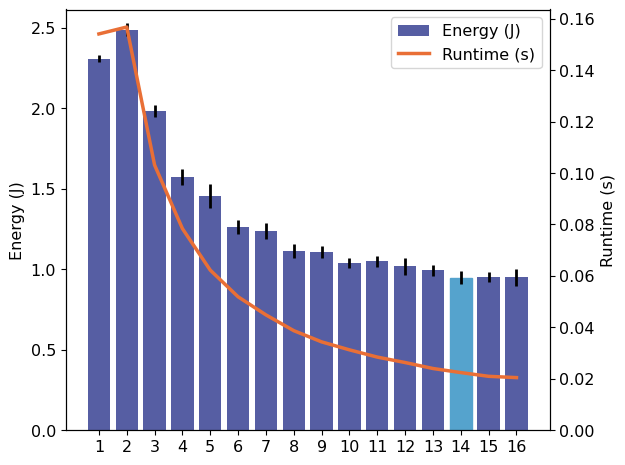

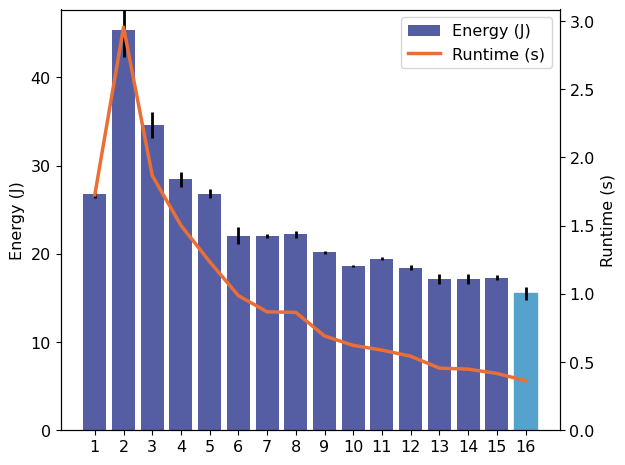

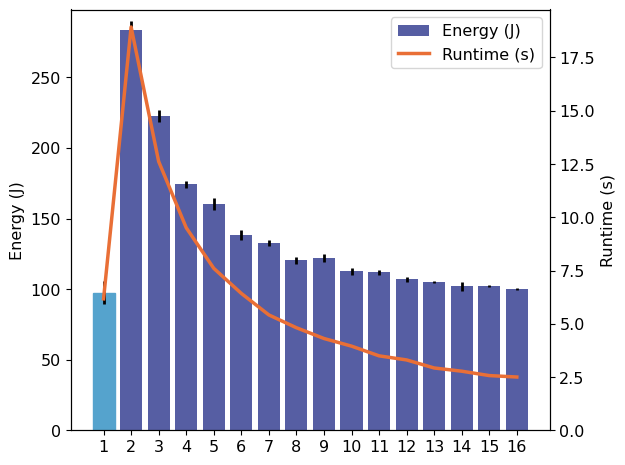

In [5]:
twin_plot(get(df_matmul, 500), '500x500 matrix multiplication')
plt.savefig('images/matmul_500.png')
plt.show()

twin_plot(get(df_matmul, 1000), '1000x1000 matrix multiplication')
plt.savefig('images/matmul_1000.png')
plt.show()

twin_plot(get(df_matmul, 1500), '1500x1500 matrix multiplication')
plt.savefig('images/matmul_1500.png')
plt.show()

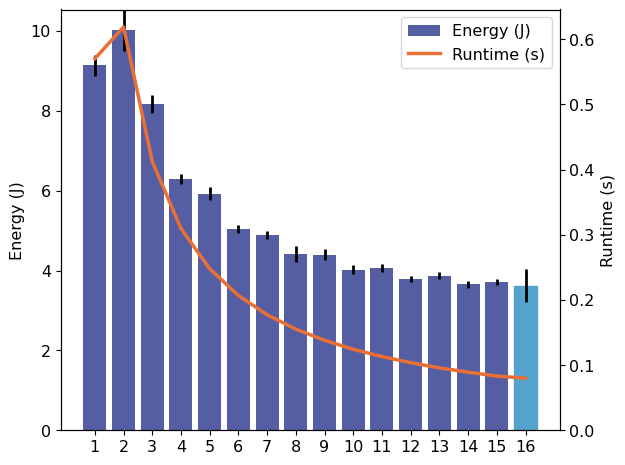

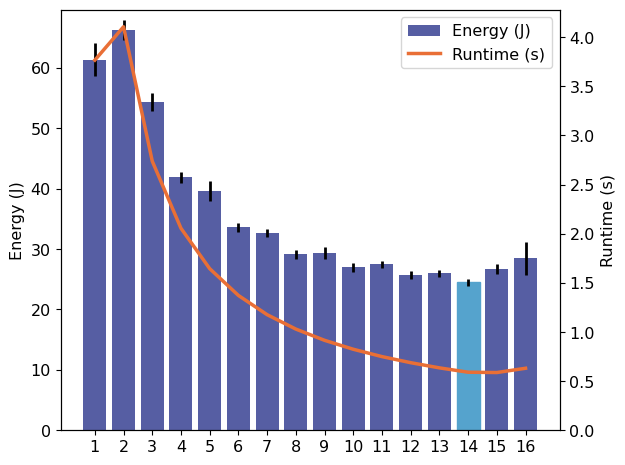

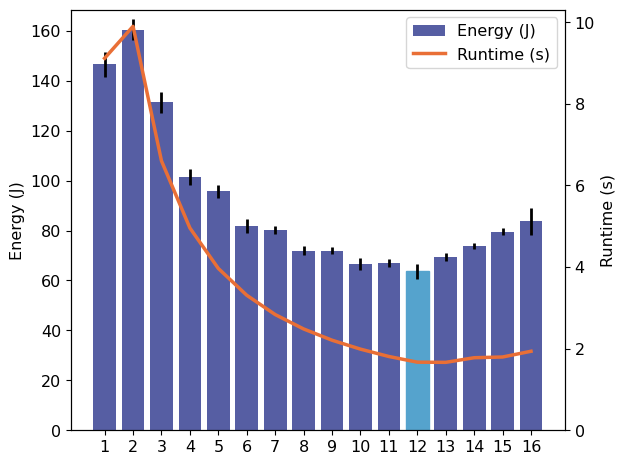

In [6]:
twin_plot(get(df_relax, 10000), '10000x10000 nine-point stencil')
plt.savefig('images/stencil_10000.png')
plt.show()

twin_plot(get(df_relax, 25000), '25000x25000 nine-point stencil')
plt.savefig('images/stencil_25000.png')
plt.show()

twin_plot(get(df_relax, 40000), '40000x40000 nine-point stencil')
plt.savefig('images/stencil_40000.png')
plt.show()

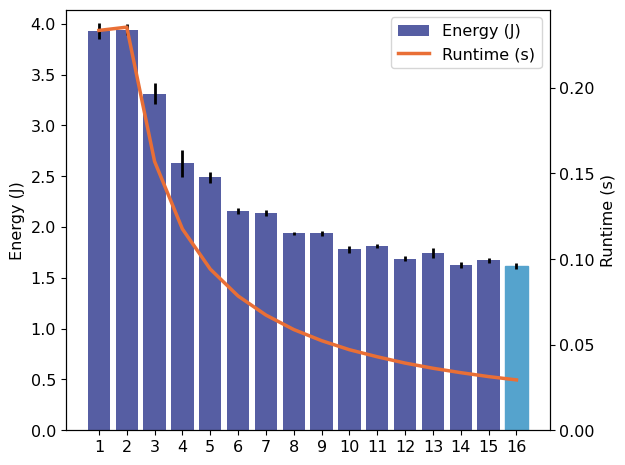

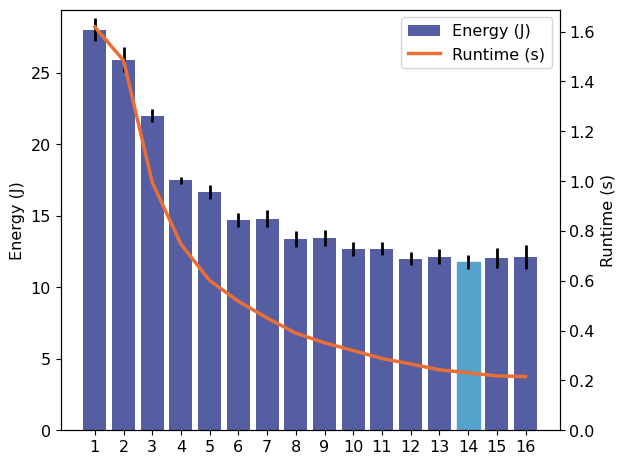

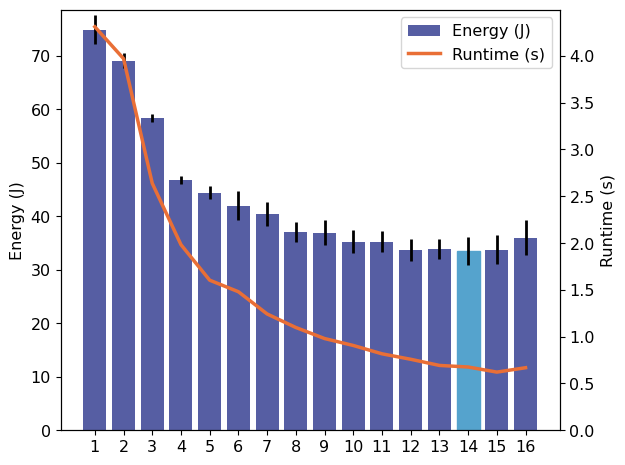

In [7]:
twin_plot(get(df_nbody, 10000), '10000 N-body')
plt.savefig('images/nbody_10000.png')
plt.show()

twin_plot(get(df_nbody, 25000), '25000 N-body')
plt.savefig('images/nbody_25000.png')
plt.show()

twin_plot(get(df_nbody, 40000), '40000 N-body')
plt.savefig('images/nbody_40000.png')
plt.show()